# BL40A2030 Wireless Communication Networks

## Week 3 - Assignment

### Author: Alex Beattie

In [50]:
import sympy as sp
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import queue
import copy
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**1. (M/M/1/K queue) Go to the p. 149 (sectin 7.2) of [this book](http://irh.inf.unideb.hu/user/jsztrik/publications/books/GlobeEdit_Basic_Queueing_Theory_Sztrik_2016.pdf).**

(a) Plot the block probability (probability of the queue is full when a new arrival happens) $P_K$ as a function of $K$ (size of the queue) for $\lambda = 1$ (arrival rate) and $\mu=2$ (service rate). Note that $P_K$ is the probability of having $K$ elements in the system. Use $K$ between 0 and 10.

Text(0, 0.5, 'Block Probability (P_n)')

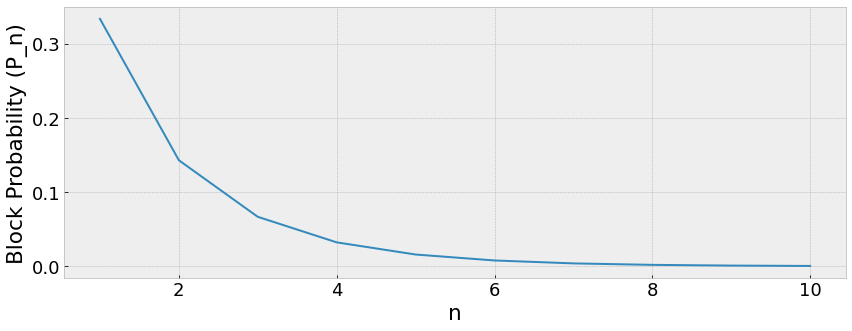

In [51]:
#M/M/1/k
# Input Parameters -- Long one
# total_time = 100 #hours
IAT_rate = 1 #elements arriving/hour
ST_rate = 2  #elements served/hour
rho = IAT_rate/ST_rate
k_max=10 #  k (size limit of the queue)

times = range(1,k_max+1)
P_n = [((1 - rho) * rho**n / (1-rho**(n+1))) for n in  times]

plt.figure(figsize=(14,5))
plt.plot(times,P_n)
plt.xlabel("n")
plt.ylabel("Block Probability (P_n)")

(b) Plot the expected waiting time in the queue system $\bar{W}$ as a function of $K$ (size of the queue) for $\lambda = 1$ (arrival rate) and $\mu=2$ (service rate). Note that $P_K$ is the probability of having $K$ elements in the system. Use $K$ between 0 and 10.

Text(0, 0.5, 'Expected Waiting Time in the Queue')

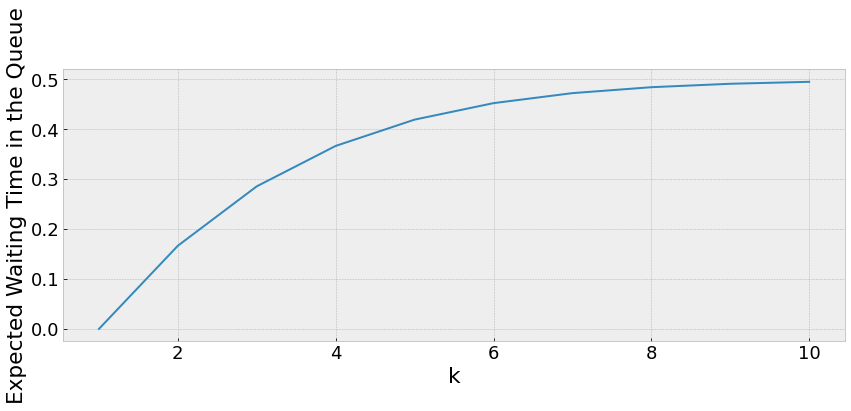

In [52]:
P_0 = [((1 - rho) * rho**0 / (1-rho**(n+1))) for n in  times]

lambda_bar = [(1- P_n[(k-1)])*IAT_rate for k in times]

N_bar = [(rho *(1 - (k+1) * rho**k + k*rho**(k+1))) / ((1-rho)*(1-rho**(k+1))) for k in times]

Q_bar = [None] * 10
for i in times:
    ref = i - 1
    Q_bar[ref] = N_bar[ref] - (1-P_0[ref])

W_bar =  [x / y for x, y in zip(Q_bar,lambda_bar)]

plt.figure(figsize=(14,5))
plt.plot(times,W_bar)
plt.xlabel("k")
plt.ylabel("Expected Waiting Time in the Queue")

(c) Discuss the trade-off involved between waiting time and block probability.

Based on the plots generated in part a and b waiting time and block probability it is reasonable to conclude that the two parameters are inversely proportional.
This means that if the queue size K is increased then the wait time in the queue will increase but the probability of the queue being full when a message arrives decreases.
This means that improving queue wait times will lead to less requests being able to be served and increasing wait times will lead to more requests served. This means
that when implementing a queue the designer must think about what is most important and make the required trade-offs and compromises for the implementation.

**2. ($x$ M/M/1 queues in tandem) Study the network of $x$ queues, a special case of the system presented in Fig. 4.16 in p. 109 from [3]. Consider that the arrival rate is $\lambda$ and the service rate is $\mu$ (the same for all servers) so that $\lambda$ smaller that $\mu$** 

- What is the probability that all $x$ queues are empty at the same time as a function of $\lambda$, $\mu$ and $\rho = \lambda/\mu$?

P[ $0_x$ customer in the $x^{th}$ queue] = P($0_x$) = (1- $\rho_{x}$)$\rho_x^0$

$\rho_x = \rho = \frac{\lambda}{\mu}$ since the probabilities are the same for each queue so P($0_x$) = ( 1 - $\rho$ )

Therefore P($0_x,0_1,...,0_x) = P($0_0$) * P($0_1$) * ... * P($0_x) = $(1 - \rho)^x$

Since the probability for each queue is the same the joint probability of all queues having 0 requests (empty) can be
represented by $(1 - \rho)^x$
- Plot this probability as a function of $\lambda$ for $\mu = 3$. Plot in the same figure using the values of $x=1,2,3,4,5$.

Text(0, 0.5, 'Probability $P(0_x)$')

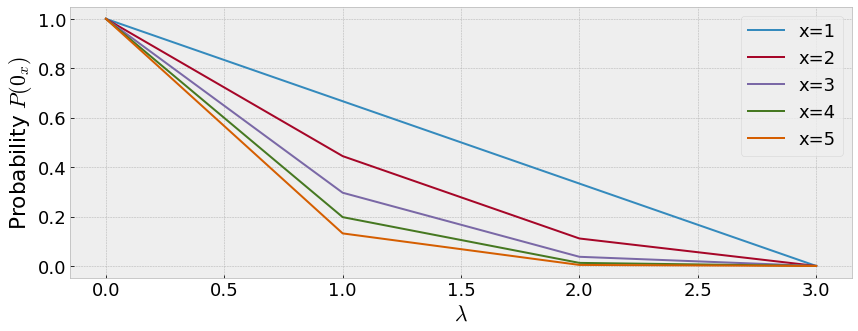

In [53]:
lam = range(0,4)

x_range = range(1,6)
mu =3
series = []
for x in x_range:
    prob = [(1- lamb / mu) ** x for lamb in lam ]
    series.append(prob)

plt.figure(figsize=(14,5))
for x in x_range:
    temp_plt = plt.plot(lam,series[(x-1)], label=f'x={x}' )

plt.legend()
plt.xlabel("$\lambda$")
plt.ylabel("Probability $P(0_x)$")

This plot shows that as the number of queues x is increased, the probability of all queues being empty decreases
which logically follows.

**3. (Optimize Slotted Aloha) In the tutorial, an optimization related to the pure Aloha was presented. Follow the same approach and optimize the Slotted Aloha. Plot the results together with the one presented in the tutorial.** 

## ALOHA

- Find the value of transmission attempts $G$ per packet time that optimazes the throughput $S$ point using sympy

In [54]:
# Visualization for sympy
sp.init_printing()

In [55]:
#Define a varible in sympy
G = sp.symbols('G')

In [56]:
S = G * sp.exp(-2*G)
S_slot = G * sp.exp(-G)

The optimal point is the solution of $\dfrac{\mathrm{d}S}{\mathrm{d}G} = 0$ in terms of $G$.

In [57]:
diff_S= sp.diff(S,G)
diff_S_slot = sp.diff(S_slot,G)

In [58]:
opt_G = sp.solve(diff_S, G)
opt_G_slot =  sp.solve(diff_S_slot, G)
opt_G[0] # solution comes as an array, need to get the first element

In [59]:
opt_S = S.subs(G,opt_G[0])
opt_S_slot = S_slot.subs(G,opt_G_slot[0])

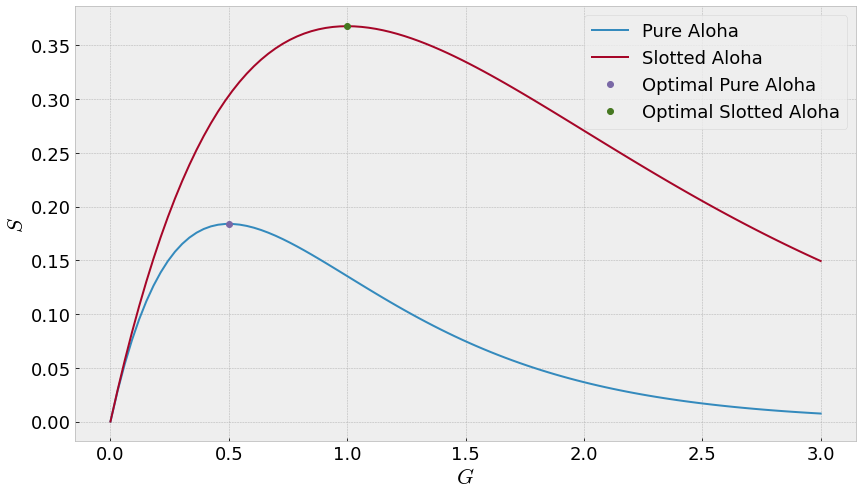

In [65]:
#Plotting using numpy
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
#
num_G = np.linspace(0, 3 , 100)
num_S = num_G * np.exp(-2*num_G)
num_S_slot = num_G * np.exp(-num_G)
opt_G = 1/2
#
plt.plot(num_G, num_S,'-',label='Pure Aloha')
plt.plot(num_G, num_S_slot,'-',label='Slotted Aloha')
plt.plot(opt_G, opt_S,'o',label='Optimal Pure Aloha')
plt.plot(opt_G_slot, opt_S_slot,'o',label='Optimal Slotted Aloha')
#
plt.xlabel("$G$")
plt.ylabel("$S$")
plt.legend()
plt.show()


**4. (Theory) Explain with your own words the basics of the following protocols. Whenever it is possible, compare their differences in terms of throughput, delay and implementation complexity. Use [this slides](http://www.cs.jhu.edu/~cs647/mac_lecture_2.pdf) to help.** 

- Pure Aloha

    In Pure Aloha whenever a sender has data it sends it. Then it listens for a broadcast from the intended destination
    to determine if the transmission was successful or not. If there was a collision then retransmission happens after a
    random period of time. Pure Aloha has a lower maximum throughput than slotted aloha but is the easiest.
- Slotted Aloha

    In slotted aloha, each sender is allocated an equal sized slot. The sender can only transmit a message during their slot.
    If no collision occurs than the sender transmits the next frame in their next slot otherwise it will retransmit the previous frame
    in the next slot until the transmission is successful. This has the potential to waste slots but is highly decentralized and simple
    to implement. It has a higher throughput than Pure Aloha but is still lower than CSMA.
- CSMA non-persistant

    CSMA listens to the medium to determine if it is idle to determine when the appropriate time to send a packet is. In non-persistent
    CSMA the sender transmits immediately if the medium is idle and if it is busy it waits a random amount of time then checks again
    and if the medium is idle it sends. Exponential backoff can help reduce the chance of collisions. This can be problamatic
    if a sender is monopolizing the medium or if there is a sender on each side of a middle node that can't see each other
    so they are unaware of each others transmissions. Of the CSMA protocols this is the easiest to implement. It's throughput
    increases as the traffic load increases unlike most of the other protocols. Most reach a peak and then decline.
- CSMA 1-persistant

    1-persistent CSMA operates the same as non-persistent CSMA except it continuously listens to the medium for it to become
    idle instead of waiting a random amount of time before listening again. This guarantees that if two nodes want to retransmit
    at the same time there will be a collision which is why retransmission is usually stopped after a few times. 1-persistent CSMA
    has a similar throughput curve to aloha but has improved throughput over those protocols.
- CSMA p-persistant

    P-persistent CSMA will transmit with probability p if the medium is idle and will have a worst case propagation delay for one packet
    with probability (1-p). It represents a good compromise between non-persistent and 1-persistent CSMA. When selecting a p value a network
    of N active nodes must make sure that N*p $\leq$ 1 to avoid collisions. Altering the p value will inversely alter the throughput and delay
    of the transmission and a p value should be strategically selected to maximize network performance. 





